In [2]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [3]:
pdb_list, length_dict, input_features = np.load("datasets/sample-input-features.npy",allow_pickle=True)

In [4]:
# pdb_list : id on the protein database http://www.rcsb.org/pdb
# length_dict : dictionary linking protein id to the number of amino acids 
#   within the chain (up to and clamped to 256 max)
# input features: the actual data on the protein chain, composed of 5 1D features for each amino acid
#   and 3 2D features which represent interactions between amino acids 

len(input_features)

# input_features.astype(np.float)

c=0
for x in input_features['1hzfA0']:
    #print(x.astype(np.float))
    plt.hist(x.astype(np.float))
    plt.savefig("./plots/1hzfA0_"+str(c)+"_plot.png")
    plt.clf()
    c+=1
#     print hist(x)



<Figure size 432x288 with 0 Axes>

In [5]:
max(input_features['1hzfA0'][6]).astype(np.float)

6.4267

In [12]:
min(input_features['1hzfA0'][3].astype(np.float))

#             feature = np.array(feature)
#             feature = feature.astype(np.float)

0.008

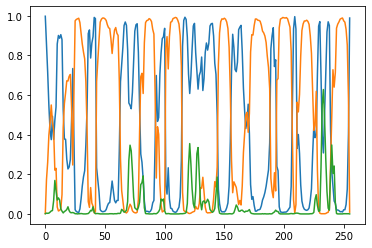

In [38]:
lab=['helix','sheet','coil']

for x in range(0,3):
    plt.plot(input_features['1hzfA0'][x].astype(np.float))
    plt.savefig("./plots/1hzfA0_secondary_plot.png")


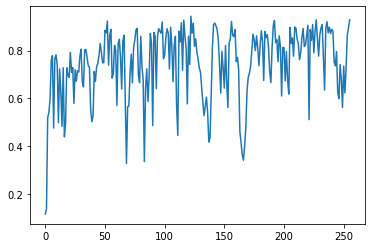

In [45]:
plt.plot(input_features['1hzfA0'][3].astype(np.float))
plt.savefig("./plots/1hzfA0_solv_plot.png")
plt.clf()
plt.plot(input_features['1hzfA0'][4].astype(np.float))
plt.savefig("./plots/1hzfA0_shannon_plot.png")


(array([  2.,  12.,  19.,  33.,  56., 122.,   6.,   3.,   0.,   3.]),
 array([0.825 , 0.8568, 0.8886, 0.9204, 0.9522, 0.984 , 1.0158, 1.0476,
        1.0794, 1.1112, 1.143 ]),
 <a list of 10 Patch objects>)

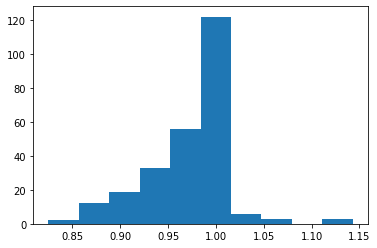

In [14]:
plt.hist(
    [x+y+z for x,y,z in zip(input_features['1hzfA0'][0].astype(np.float),
                            input_features['1hzfA0'][1].astype(np.float),
                            input_features['1hzfA0'][2].astype(np.float)
                           )]
)

In [15]:
pdb_list_y, distance_maps_cb = np.load("datasets/sample-distance-maps-cb.npy",encoding="latin1",allow_pickle=True)

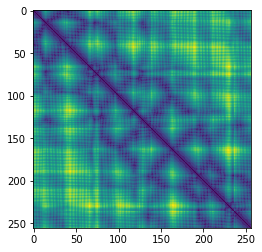

In [20]:
# pdb_list_y is a list of the protein id's
# distance_maps_cb is relative distances between each amino acid


# item for sublist in l for item in sublist

m=max([a for sublist in distance_maps_cb['1hzfA0'] for a in sublist])

# plt.plot(distance_maps_cb['1hzfA0'][0])

plt.imshow(np.array(distance_maps_cb['1hzfA0']))
plt.savefig("./plots/1hzfA0_rdst_plot.png")



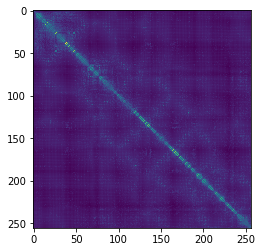

In [21]:
l=len(input_features['1hzfA0'][0])

# plt.imshow(np.array(input_features['1hzfA0'][5].reshape(l, l)).astype(np.float))

plt.imshow(
    np.array(input_features['1hzfA0'][6].reshape(l, l)).astype(np.float)-        
    (np.array(distance_maps_cb['1hzfA0'])/m)
)

# plt.imshow(
#     np.dot(

#         numpy.array(distance_maps_cb['1hzfA0'])/m,
#                 np.array(input_features['1hzfA0'][7].reshape(l, l)).astype(np.float)
#     )
# )
# plt.imshow((numpy.array(distance_maps_cb['1hzfA0'])/m))
# np.amax((numpy.array(distance_maps_cb['1hzfA0'])/m))

In [33]:
suffices=([a[4:6] for a in pdb_list])


from collections import Counter

Counter(suffices)

Counter({'A0': 169,
         'P0': 2,
         'B0': 14,
         'N0': 1,
         'I0': 3,
         'C0': 4,
         'D0': 2,
         'G0': 2,
         'S0': 1,
         'F0': 1,
         'L0': 1})

In [37]:
Counter([a[0:4] for a in pdb_list])

Counter({'12as': 1,
         '16pk': 1,
         '16vp': 1,
         '1a0t': 1,
         '1a2z': 1,
         '1a8r': 1,
         '1ahs': 1,
         '1aih': 1,
         '1ais': 1,
         '1am9': 1,
         '1aoc': 1,
         '1aol': 1,
         '1at0': 1,
         '1au1': 1,
         '1b33': 1,
         '1b35': 2,
         '1b3t': 1,
         '1b67': 1,
         '1b77': 1,
         '1b9w': 1,
         '1bd3': 1,
         '1bgf': 1,
         '1bnd': 1,
         '1bou': 1,
         '1bx7': 1,
         '1bxy': 1,
         '1byr': 1,
         '1c0p': 1,
         '1c1k': 1,
         '1c5e': 1,
         '1c8z': 1,
         '1cbf': 1,
         '1cbk': 1,
         '1cfz': 1,
         '1cjc': 1,
         '1cl8': 1,
         '1cmc': 1,
         '1cq3': 1,
         '1cse': 1,
         '1csh': 1,
         '1cxz': 1,
         '1d02': 1,
         '1d2p': 1,
         '1d2z': 2,
         '1d9c': 1,
         '1dbf': 1,
         '1dcq': 1,
         '1ddz': 1,
         '1dfm': 1,
         '1dfu': 1,


In [ ]:
# give ryan the 2d matrices and a way to read them on slack for a given protein

In [51]:
input_features['1hzfA0'][5].astype(np.float).savetxt()

array([1.    , 0.1757, 0.1389, ..., 0.1177, 0.2129, 1.    ])

In [10]:
sorted(length_dict.values())

[51,
 58,
 60,
 60,
 61,
 61,
 61,
 61,
 62,
 63,
 63,
 65,
 67,
 67,
 67,
 67,
 68,
 69,
 70,
 70,
 74,
 74,
 75,
 76,
 79,
 80,
 82,
 85,
 86,
 88,
 89,
 90,
 91,
 91,
 94,
 94,
 95,
 96,
 98,
 98,
 100,
 102,
 102,
 103,
 104,
 104,
 105,
 107,
 108,
 109,
 110,
 114,
 115,
 118,
 118,
 119,
 120,
 120,
 121,
 121,
 123,
 124,
 124,
 125,
 126,
 127,
 127,
 127,
 127,
 127,
 130,
 132,
 133,
 133,
 134,
 134,
 134,
 135,
 137,
 138,
 138,
 138,
 139,
 139,
 141,
 141,
 143,
 144,
 145,
 147,
 147,
 148,
 149,
 150,
 151,
 151,
 152,
 152,
 156,
 158,
 158,
 158,
 160,
 161,
 162,
 162,
 162,
 163,
 164,
 165,
 166,
 166,
 166,
 167,
 168,
 170,
 170,
 172,
 175,
 176,
 184,
 184,
 185,
 185,
 188,
 190,
 193,
 196,
 197,
 208,
 211,
 211,
 214,
 217,
 220,
 221,
 223,
 223,
 224,
 224,
 225,
 228,
 228,
 229,
 230,
 230,
 233,
 239,
 240,
 247,
 255,
 255,
 255,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 256,
 2